In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
from pandas_datareader import data as pdr
import yfinance as yf

In [3]:
yf.pdr_override()
# download dataframe
df = pdr.get_data_yahoo("AAPL", start="2012-01-01", end="2020-01-01")


[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,51.115936,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.390648,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.961189,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.504375,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.421093,98506100


In [5]:
df['Open-Close']=df.Open - df.Close
df['High-Low']=df.High - df.Low
df = df.dropna()
X = df[['Open-Close', 'High-Low']]
X.head()


,Open-Close,High-Low
Date,,
2012-01-03,-0.261429,0.500000
2012-01-04,-0.491428,0.771431
2012-01-05,-0.439999,0.840000
2012-01-06,-0.375713,0.504284
2012-01-09,0.538570,0.914288


In [6]:
Y = np.where(df['Close'].shift(-1)>df['Close'],1,-1)

In [7]:
split_percent = 0.8
split = int(split_percent*len(df))
X_train = X[:split]
Y_train = Y[:split]
X_test = X[:split]
Y_test = Y[:split]

In [8]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,Y_train)
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))
print('Train_data Accuracy: %.2f' %accuracy_train)
print('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.61
Test_data Accuracy: 0.61


C:\Users\Pedro Takenouchi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


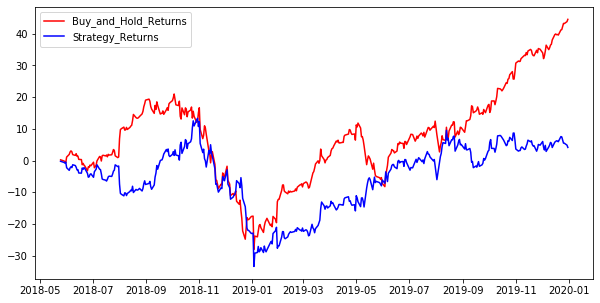

In [9]:
df['Predicted_Signal'] = knn.predict(X)

df['Buy_and_Hold_Returns'] = np.log(df['Close']/df['Close'].shift(1))
Cum_Buy_and_Hold_Ret = df[split:]['Buy_and_Hold_Returns'].cumsum()*100

df['Strategy_Returns'] = df['Buy_and_Hold_Returns']* df['Predicted_Signal'].shift(1)
Cum_Strategy_Ret = df[split:]['Strategy_Returns'].cumsum()*100

plt.figure(figsize=(10,5))
plt.plot(Cum_Buy_and_Hold_Ret, color='r', label ='Buy_and_Hold_Returns')
plt.plot(Cum_Strategy_Ret , color='b', label ='Strategy_Returns')
plt.legend()
plt.show()

In [10]:
Std = Cum_Strategy_Ret.std()
Sharpe = (Cum_Strategy_Ret - Cum_Buy_and_Hold_Ret)/Std
Sharpe = Sharpe.mean()
print('Sharpe ratio: %.2f' %Sharpe)

Sharpe ratio: -1.23


In [11]:
print(Cum_Strategy_Ret.tail(1))

Date
2019-12-31    4.141046
Name: Strategy_Returns, dtype: float64


In [12]:
print(Cum_Buy_and_Hold_Ret.tail(1))

Date
2019-12-31    44.514908
Name: Buy_and_Hold_Returns, dtype: float64


In [15]:
!pip install pyfolio

In [16]:
import pyfolio as pf

In [100]:
import pprint

Start date,2018-05-25
End date,2019-12-31
Total months,19
,Backtest
Annual return,1.4412010502336786e+179%
Cumulative returns,2.0575819883270487e+285%
Annual volatility,15952.8%
Sharpe ratio,-7.84
Calmar ratio,2280195464008102228399533592552734637614635530070480079439163152730667182890801657196372431894154151351052124145969424169539502611804437635695471538175196823711000499972997120.00
Stability,NaN
Max drawdown,-63205.2%


C:\Users\Pedro Takenouchi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,63205.15,2018-11-07,2018-11-16,2018-11-19,9
1,3338.31,2019-01-02,2019-01-03,2019-01-04,3
2,2897.99,2019-01-04,2019-01-07,2019-01-08,3
3,2877.55,2019-01-08,2019-01-09,2019-01-10,3
4,2876.51,2019-01-16,2019-01-17,2019-01-18,3


Stress Events,mean,min,max
New Normal,-496.33%,-3338.31%,1330.64%


TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

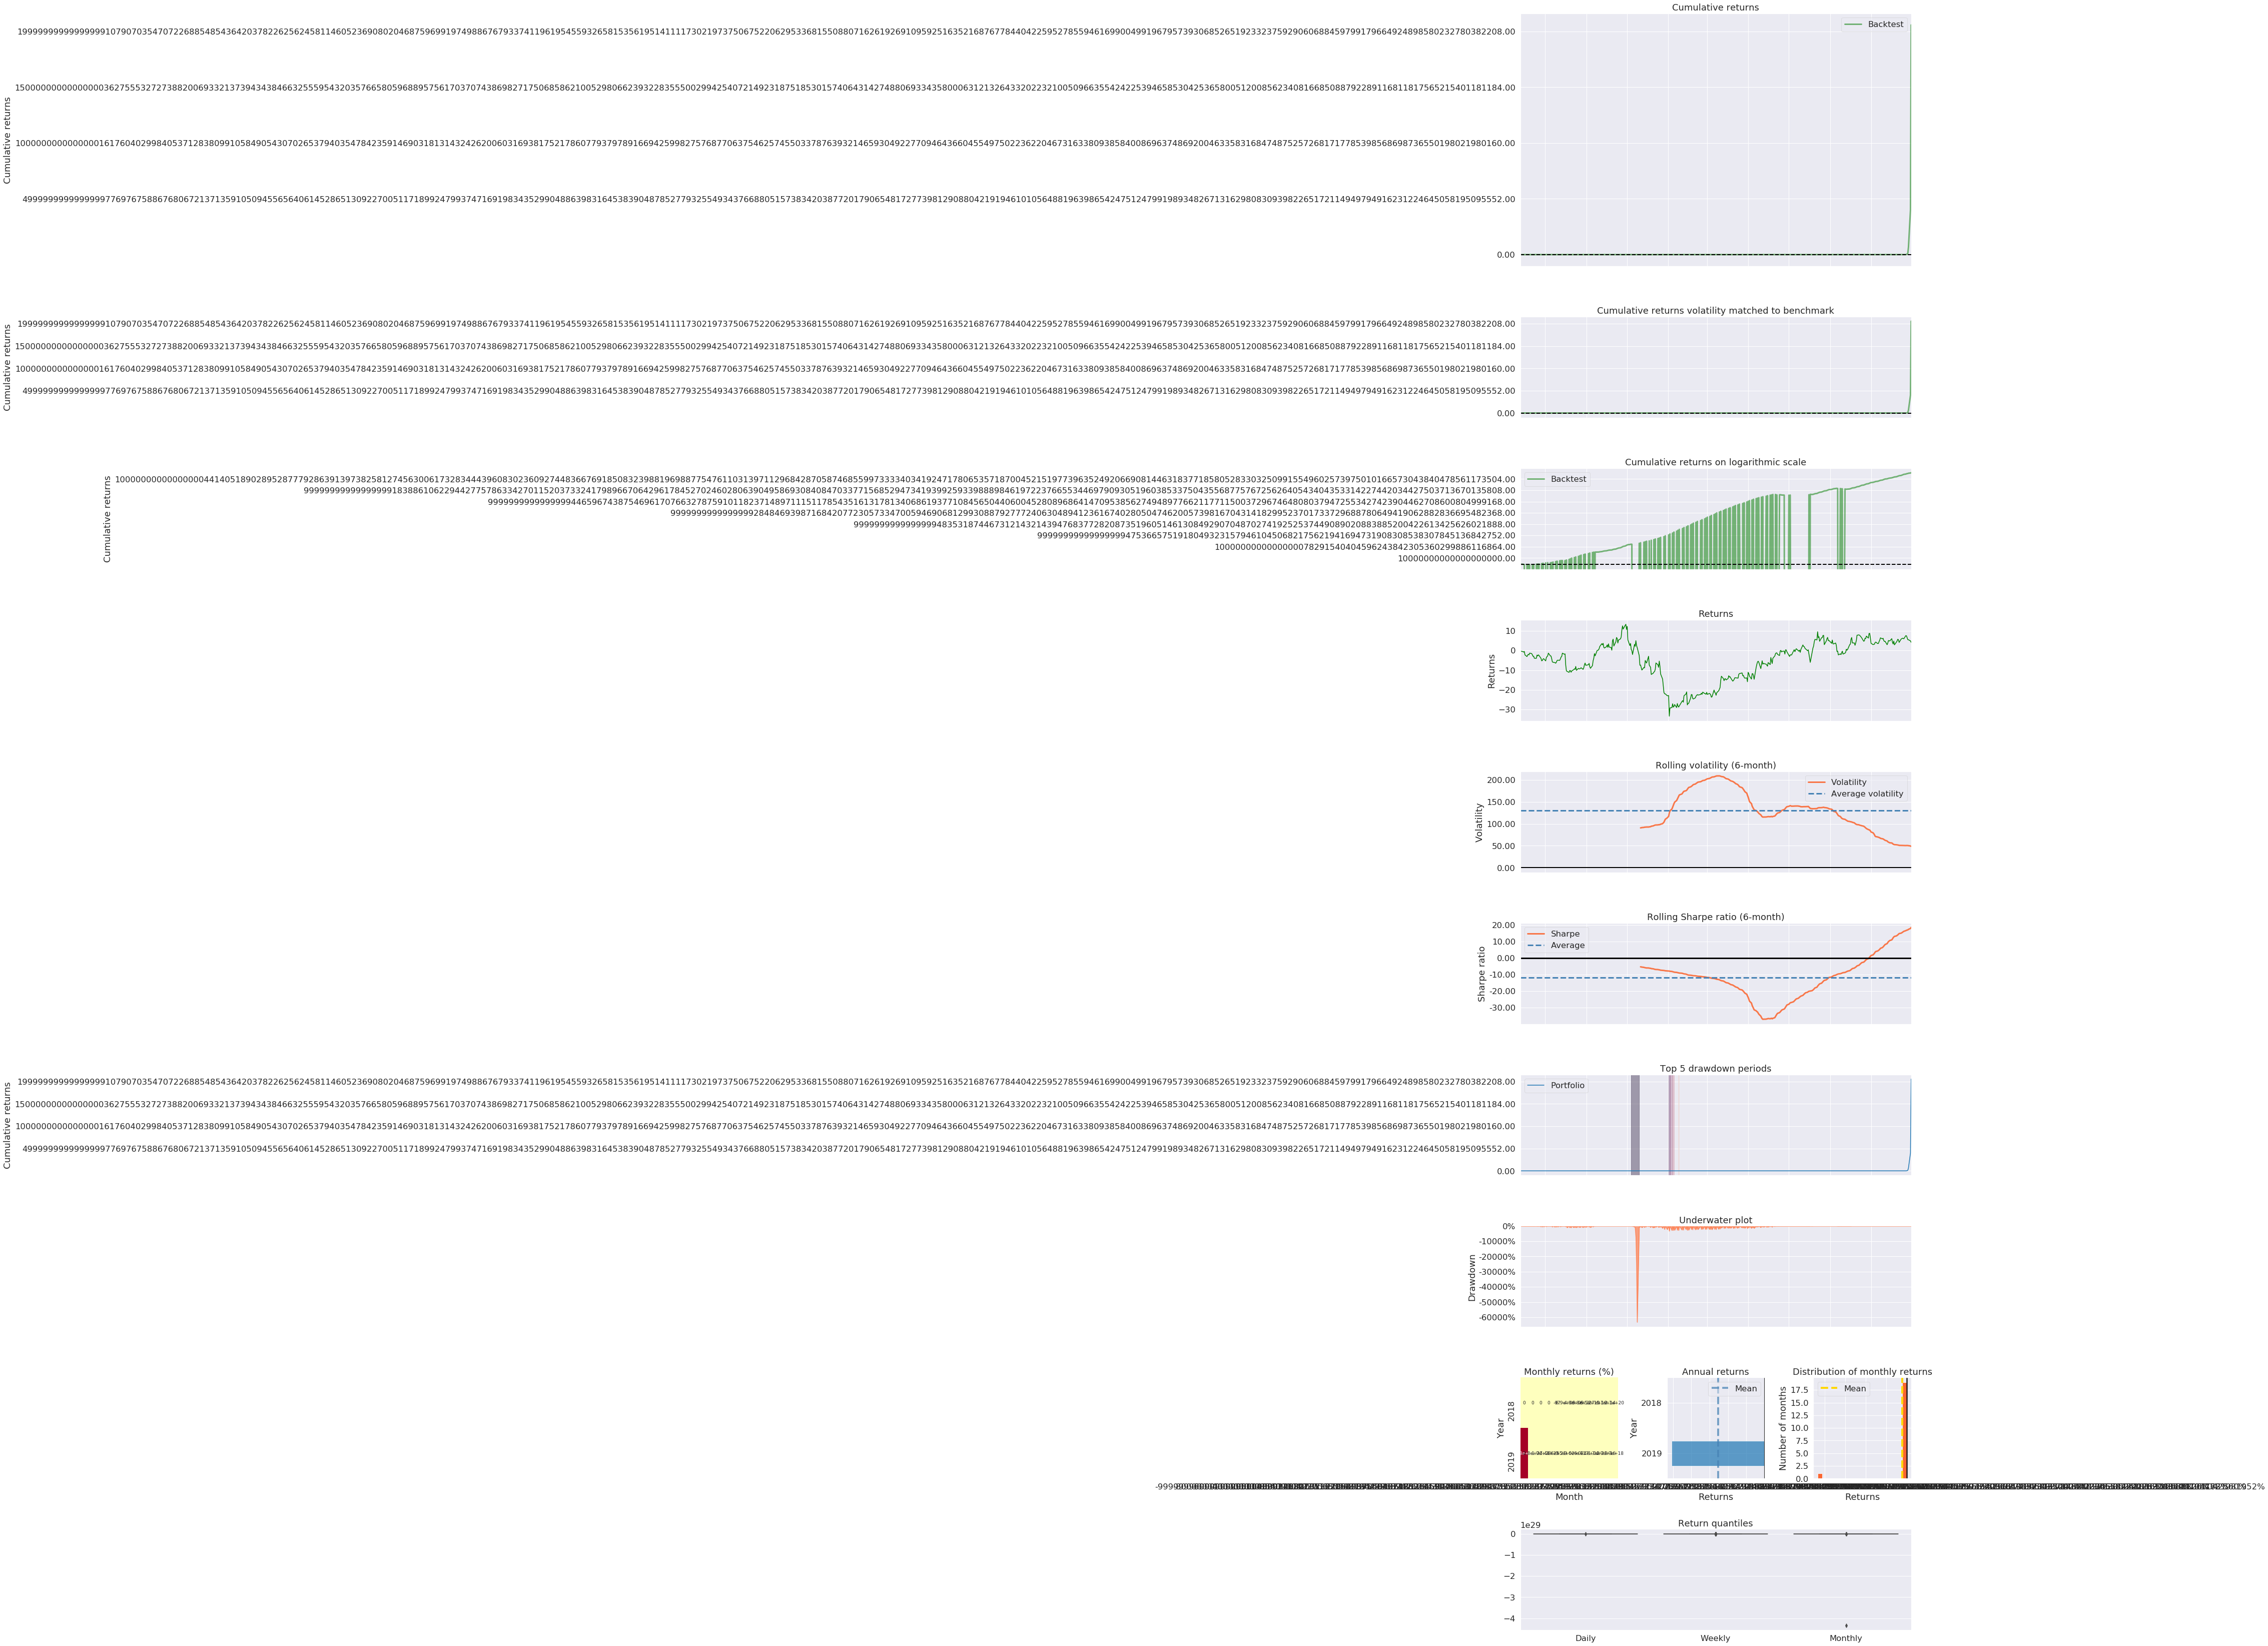

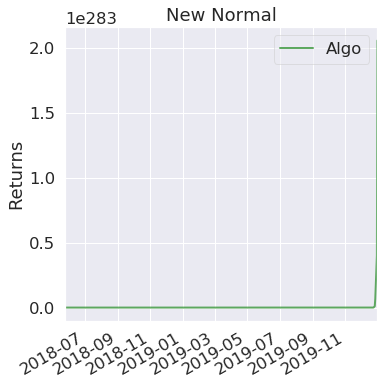

In [101]:
pprint.PrettyPrinter(pf.create_full_tear_sheet(Cum_Strategy_Ret))


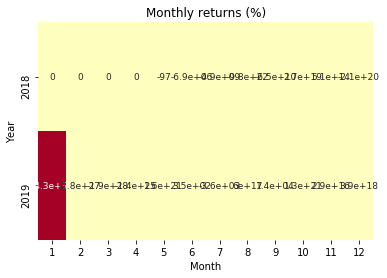

In [18]:
pf.plot_monthly_returns_heatmap(Cum_Strategy_Ret)

C:\Users\Pedro Takenouchi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


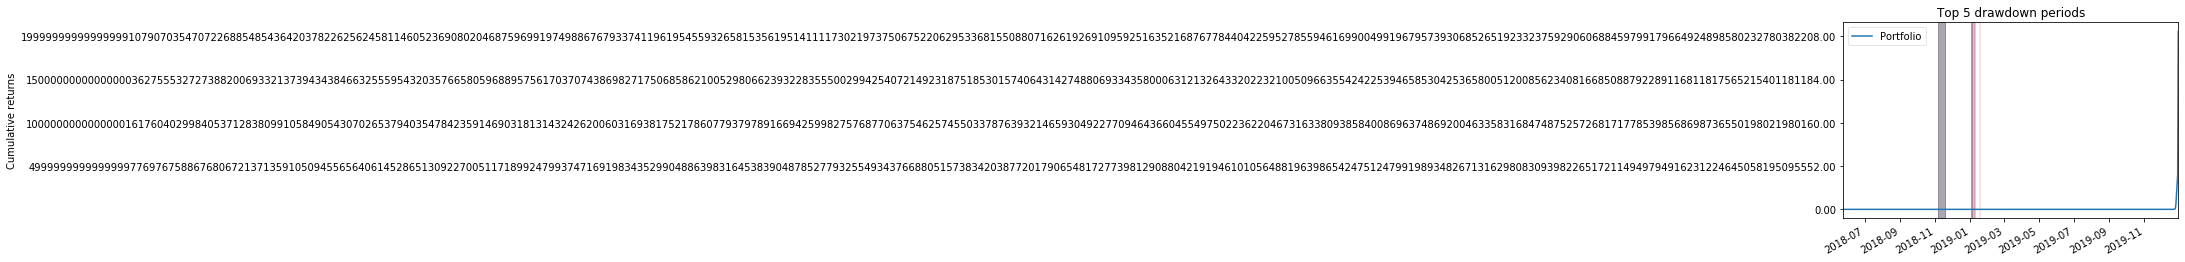

In [19]:
pf.plot_drawdown_periods(Cum_Strategy_Ret, 5)

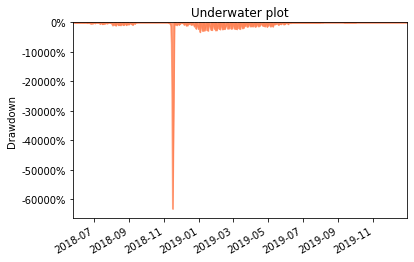

In [20]:
pf.plot_drawdown_underwater(Cum_Strategy_Ret)

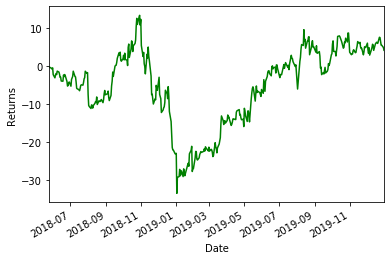

In [21]:
pf.plot_returns(Cum_Strategy_Ret)

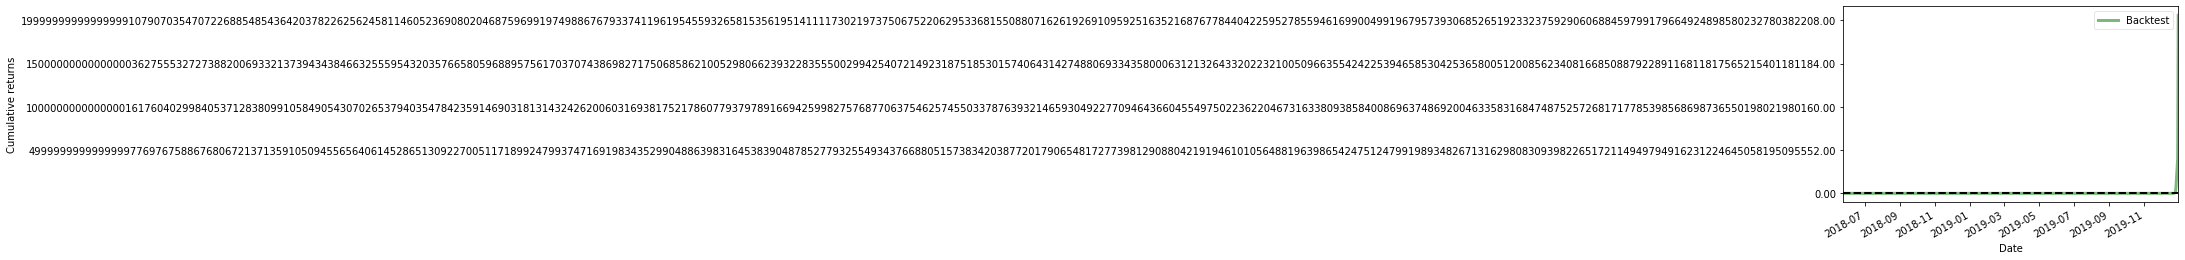

In [22]:
pf.plot_rolling_returns(Cum_Strategy_Ret)

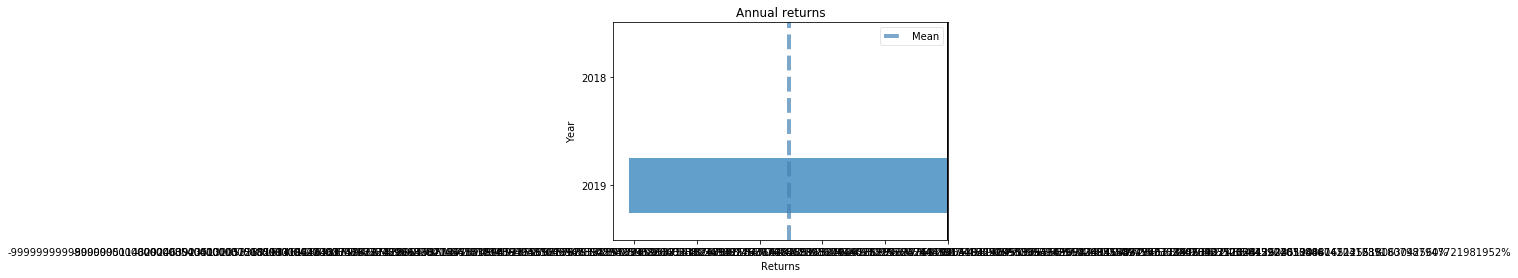

In [23]:
pf.plot_annual_returns(Cum_Strategy_Ret)

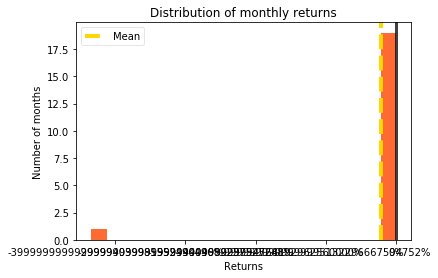

In [24]:
pf.plot_monthly_returns_dist(Cum_Strategy_Ret)

In [25]:
pf.show_worst_drawdown_periods(Cum_Strategy_Ret)

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,63205.15,2018-11-07,2018-11-16,2018-11-19,9
1,3338.31,2019-01-02,2019-01-03,2019-01-04,3
2,2897.99,2019-01-04,2019-01-07,2019-01-08,3
3,2877.55,2019-01-08,2019-01-09,2019-01-10,3
4,2876.51,2019-01-16,2019-01-17,2019-01-18,3


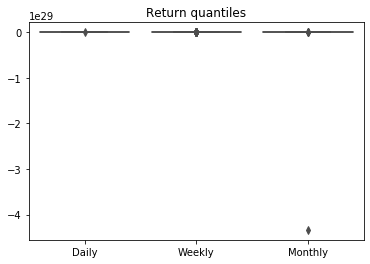

In [26]:
pf.plot_return_quantiles(Cum_Strategy_Ret)

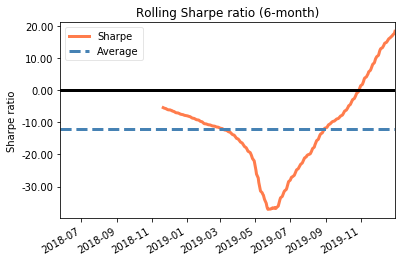

In [27]:
pf.plot_rolling_sharpe(Cum_Strategy_Ret)

In [28]:
!pip install mpl-finance

In [29]:
%matplotlib inline
import mpl_finance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.pylab
matplotlib.pylab.rcParams['figure.figsize'] = (12, 7)
import atw

In [30]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
spy = pdr.get_data_yahoo("SPY", start="2012-01-01", end="2020-01-01")
spy.columns = map(str.lower, spy.columns)
spy['return'] = spy['close'].pct_change().fillna(0)
spy.head()

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,adj close,volume,return
Date,,,,,,,
2012-01-03,127.760002,128.380005,127.430000,127.500000,108.672401,193697900,0.000000
2012-01-04,127.199997,127.809998,126.709999,127.699997,108.842880,127186500,0.001569
2012-01-05,127.010002,128.229996,126.430000,128.039993,109.132668,173895000,0.002662
2012-01-06,128.199997,128.220001,127.290001,127.709999,108.851387,148050000,-0.002577
2012-01-09,128.000000,128.179993,127.410004,128.020004,109.115646,99530200,0.002427


In [67]:
import timeit
timeit.Timer()
port = pd.DataFrame(spy['return'])
port['strategy'] = port[port['return'].shift(1) <= -0.005]['return']
timeit.Timer()

In [68]:
timeit.Timer()

port = pd.DataFrame(spy['return'])

for ix, _ in port.iterrows():
    loc = port.index.get_loc(ix)
    if loc > 0:
        yday = port.iloc[loc - 1]
        if yday['return'] <= -0.005:
            port.loc[ix, "strategy"] = port.loc[ix, 'return']
            
timeit.Timer()

In [69]:
timeit.Timer()

port = pd.DataFrame(spy['return'])

for ix, loc in atw.iterate(port, progress=True):
    yday = port.iloc[loc - 1]
    if yday['return'] <= -0.005:
        port.loc[ix, 'strategy'] = port.loc[ix, 'return']
    
timeit.Timer()

[*********************100%***********************]  2012 of 2012 complete


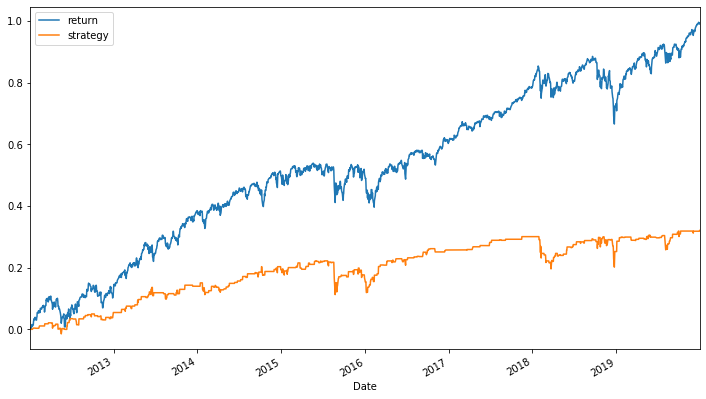

In [70]:
port.fillna(0, inplace=True)
port.cumsum().plot()

In [71]:
returns = port['strategy'][port['strategy'] != 0]
sharpe = np.sqrt(252) * (np.mean(returns)) / np.std(returns)

sharpe

1.273593588100762

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000106125F1390>,
      dtype=object)

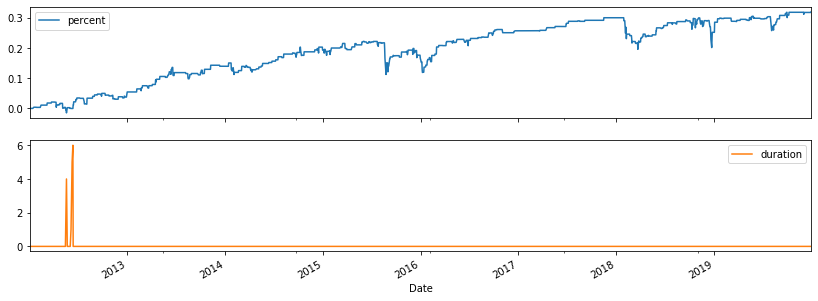

In [72]:
dd = pd.DataFrame(data={"percent": port['strategy'].cumsum()})
dd['duration'] = np.where(dd['percent'] < 0, 1, 0)
dd['duration'] = dd['duration'].groupby(
                        (dd['duration'] == 0).cumsum() ).cumcount()

dd[['percent', 'duration']].plot(figsize=(14, 5), subplots=True)

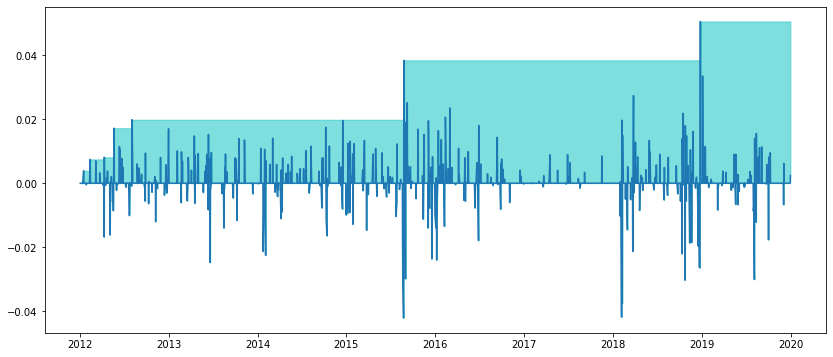

In [103]:
dd['max'] = dd['percent'].rolling(len(dd), min_periods=1).max()

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(dd['percent'], lw=1.5)
ax.fill_between(dd.index, dd['percent'], dd['max'], color='c', alpha=.5)

In [74]:
max_dd = dd['percent'].min()
total_returns = sum(port['strategy'])
recovery_factor = total_returns / abs(max_dd)

recovery_factor

21.67528380860615

In [75]:
start_value = 1
end_value = 1 + sum(port['strategy'])
years = len(returns.resample("A").count())    
cagr = ((end_value / start_value) ** (1 / years)) - 1

cagr

0.03536790204834239

In [76]:
dd = atw.drawdown(port['strategy'])

stats = [
    ("Sharpe ratio", "%.2f" % atw.sharpe(port['strategy'])),
    ("CAGR", "%.2f%%" % (atw.cagr(port['strategy']) * 100)),
    ("Win %", "%.2f%%" % (atw.win_rate(port['strategy']) * 100)),
    ("Avg. %", "%.2f%%" % (atw.avg_return(port['strategy']) * 100)),
    ("Avg. Win %", "%.2f%%" % (atw.avg_win(port['strategy']) * 100)),
    ("Avg. Loss %", "%.2f%%" % (atw.avg_loss(port['strategy']) * 100)),
    ("Profit Factor", "%.2f" % atw.profit_factor(port['strategy'])),
    ("Max DD %", "%.2f%%" % (dd['percent'].min() * 100)),
    ("DD Duration %", "%.0f days" % dd['duration'].max() ),
    ("Recovery Factor", "%.2f" % atw.recovery_factor(port['strategy'], dd['percent']))
]
 
stats = pd.DataFrame(stats, columns=['metric', 'value'])
stats.set_index(stats.columns[0], inplace=True)

print(stats)

                  value
metric                 
Sharpe ratio       1.27
CAGR              3.80%
Win %            56.63%
Avg. %            0.09%
Avg. Win %        0.78%
Avg. Loss %      -0.82%
Profit Factor      1.25
Max DD %         -4.21%
DD Duration %    4 days
Recovery Factor    7.61


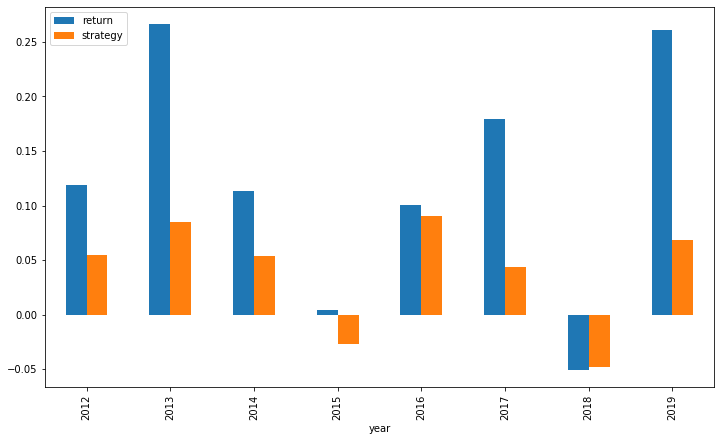

In [77]:
atw.sum_by_year(port).plot(kind='bar')

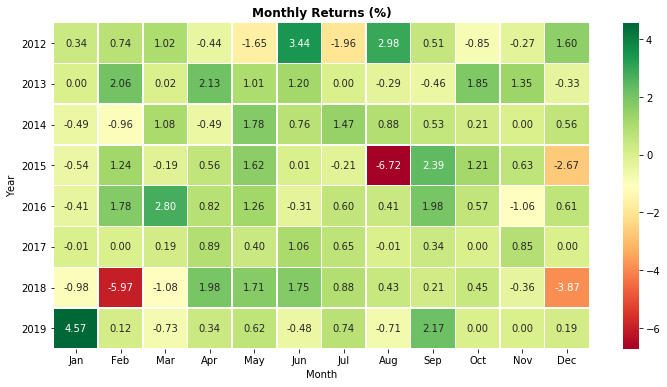

In [78]:
atw.monthly_returns_heatmap(port['strategy'])

In [79]:
train, test = atw.train_test_split(spy, test_size=.2)

In [80]:
port = pd.DataFrame(train)
port['ma1'] = port['close'].rolling(window=50).mean()
port['ma2'] = port['close'].rolling(window=100).mean()

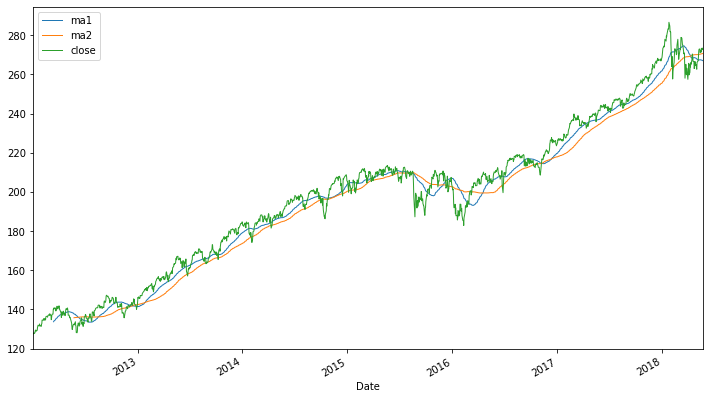

In [81]:
port[['ma1', 'ma2', 'close']].plot(linewidth=1)

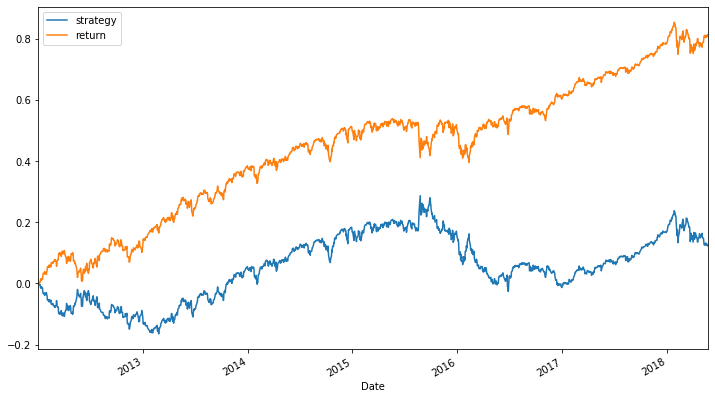

In [82]:
port['strategy'] = port['return'] * np.where(
    port['ma1'].shift(1) >= port['ma2'].shift(1), 1, -1)

port[['strategy', 'return']].cumsum().plot()

In [83]:
def ma_strategy(prices, ma_fast, ma_slow):
    df = pd.DataFrame(data={"price": prices})
    df['return'] = df['price'].pct_change(1)
    df['ma1'] = df['price'].rolling(window=ma_fast).mean()
    df['ma2'] = df['price'].rolling(window=ma_slow).mean()
    df['strategy'] = df['return'] * np.where(
        df['ma1'].shift(1) >= df['ma2'].shift(1), 1, -1)

    return df['strategy'].fillna(0)

In [84]:
ma1 = np.linspace(5, 50, 20).astype(int)
ma2 = np.linspace(100, 200, 21).astype(int)
print("MA1 =", ma1)
print("MA2 =", ma2)

MA1 = [ 5  7  9 12 14 16 19 21 23 26 28 31 33 35 38 40 42 45 47 50]
MA2 = [100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175 180 185
 190 195 200]


In [85]:
sharpes = np.zeros((len(ma1), len(ma2)))
returns = np.zeros(sharpes.shape)
drawdowns = np.zeros(sharpes.shape)

In [86]:
timeit.Timer()
for i1, ma1_val in enumerate(ma1):
    for i2, ma2_val in enumerate(ma2):
        pnl = ma_strategy(train['close'], ma1_val, ma2_val)

        sharpes[i1, i2] = atw.sharpe(pnl)
        returns[i1, i2] = sum(pnl)
        drawdowns[i1, i2] = atw.drawdown(pnl)['percent'].min()
timeit.Timer()

In [87]:
pd.DataFrame(sharpes).loc[:5, :5]

,0,1,2,3,4,5
0,0.012122,0.025453,0.054610,0.054617,0.168499,0.110249
1,0.150427,0.305627,0.366954,0.268063,0.190140,0.092323
2,0.202090,0.293537,0.261625,0.139826,0.082268,0.070842
3,0.172656,0.143086,0.180651,0.192354,0.140340,0.194129
4,0.143335,0.119822,0.094648,0.077152,0.110727,0.127956
5,0.071169,0.042307,0.005171,0.069202,0.104057,0.224141


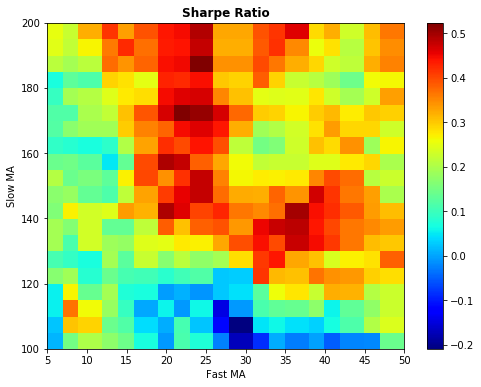

In [88]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.pcolormesh(ma1, ma2, sharpes.T, cmap="jet")
plt.title("Sharpe Ratio", fontweight="bold", color="black")
plt.xlabel("Fast MA")
plt.ylabel("Slow MA")
plt.colorbar()

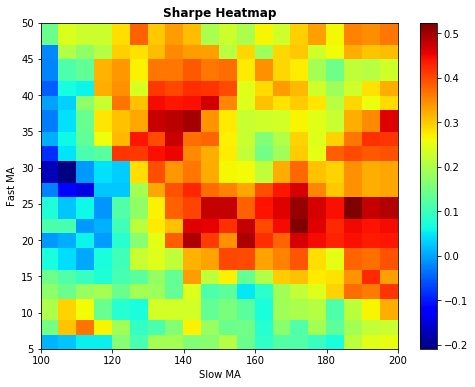

In [89]:
atw.colormap2d(x=ma1, y=ma2, res=sharpes, 
               x_title="Fast MA", y_title="Slow MA", 
               title="Sharpe Heatmap")

In [90]:
i1, i2 = np.unravel_index(sharpes.argmax(), sharpes.shape)
print('Optimal Fast MA = %.f' % ma1[i1])
print('Optimal Slow MA = %.f' % ma2[i2])

Optimal Fast MA = 23
Optimal Slow MA = 185


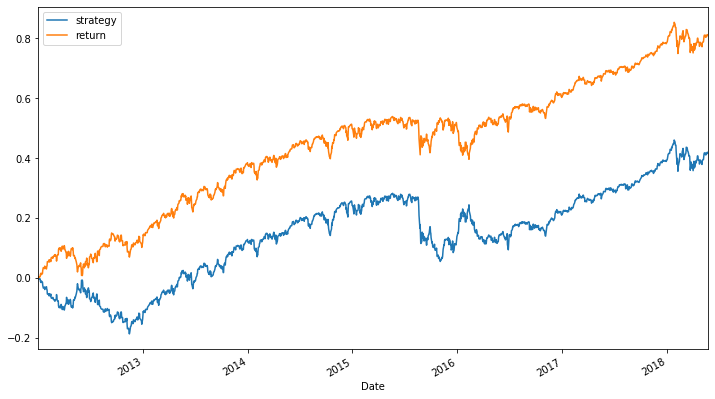

In [91]:
train_port = train[['close', 'return']].copy()
train_port['strategy'] = ma_strategy(train_port['close'], ma1[i1], ma2[i2])
train_port[['strategy', 'return']].cumsum().plot()

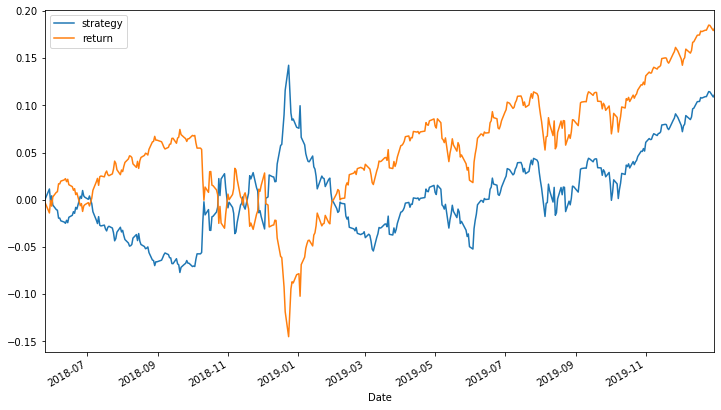

In [92]:
test_port = test[['close', 'return']].copy()
test_port['strategy'] = ma_strategy(test_port['close'], ma1[i1], ma2[i2])
test_port[['strategy', 'return']].cumsum().plot()

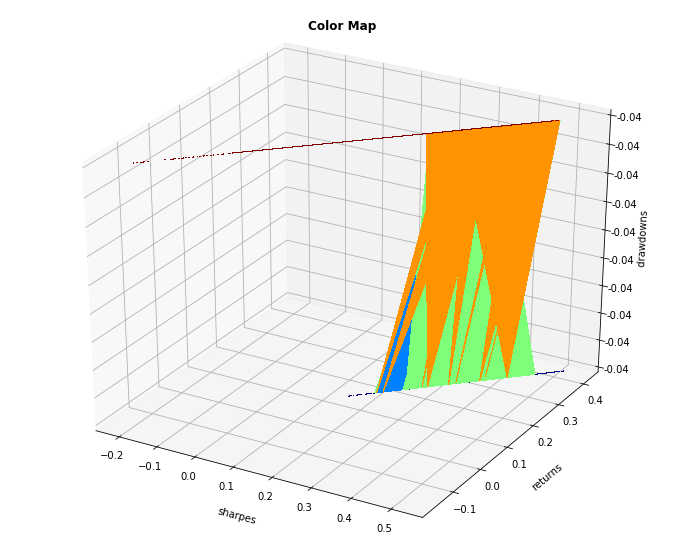

In [93]:
atw.colormap3d(sharpes, returns, drawdowns, 
               "sharpes", "returns", "drawdowns")

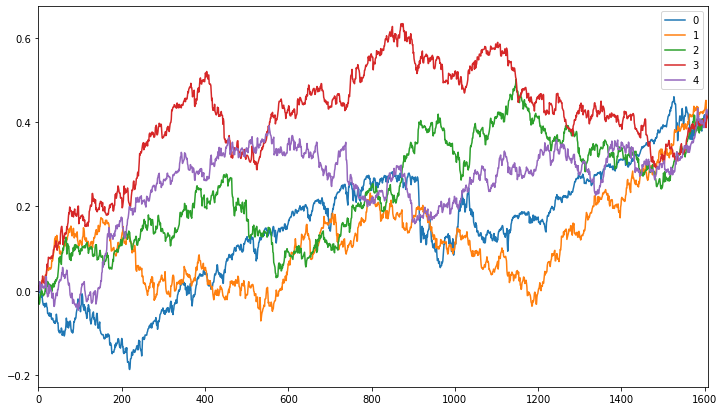

In [94]:
returns = train_port['strategy']
results = [returns.values]
for i in range(1, 5):
    results.append(returns.sample(frac=1).values)
mc = pd.DataFrame(results).fillna(0).transpose()

mc.cumsum().plot()

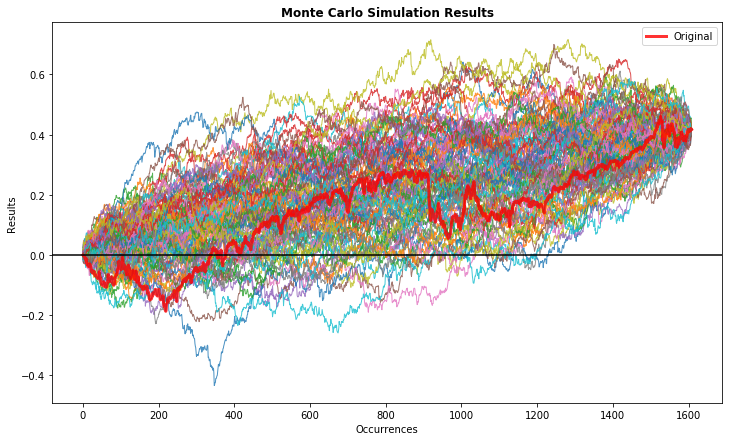

In [95]:
mc = atw.montecarlo(returns, sims=100, bust=-0.2, goal=.5)
mc.plot()